In [1]:
# Импорт библиотек
import os
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, adjusted_rand_score, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [2]:
# Укажите путь к папке с файлами
data_folder = r"C:\Users\Гребенников Матвей\Desktop\Диплом\Курсовая\MachineLearningCSV\MachineLearningCVE"

# Список файлов
file_list = [os.path.join(data_folder, file) for file in os.listdir(data_folder) if file.endswith('.csv')]

# Объединяем файлы в один DataFrame
data = pd.concat([pd.read_csv(file) for file in file_list], ignore_index=True)
print(f"Размер объединенных данных: {data.shape}")


Размер объединенных данных: (2830743, 79)


In [3]:
# Удаление некорректных строк
valid_classes = ['BENIGN', 'MALICIOUS']
data = data[data.iloc[:, -1].isin(valid_classes)]

# Предполагается, что последний столбец - это метки классов, а остальные - признаки
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Обработка NaN, Inf и слишком больших значений
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)
X = X.astype(np.float32)

# Кодирование целевой переменной
y = y.map({'BENIGN': 0, 'MALICIOUS': 1})

# Проверка на пропущенные значения
if y.isnull().sum() > 0:
    print("Пропущенные значения в y найдены, удаляем...")
    y.dropna(inplace=True)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Преобразование целевой переменной в one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Если y_train и y_test в one-hot encoding, преобразуйте их обратно в бинарный формат
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)



In [4]:
# Построение модели
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Входной слой
model.add(Dropout(0.5))  # Dropout для предотвращения переобучения
model.add(Dense(32, activation='relu'))  # Скрытый слой
model.add(Dense(1, activation='sigmoid'))  # Выходной слой с функцией sigmoid

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)



C:\Users\Гребенников Матвей\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
19890/19890 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step - accuracy: 0.9978 - loss: 0.0080 - val_accuracy: 1.0000 - val_loss: 2.4576e-13
Epoch 2/20
19890/19890 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 1.0000 - loss: 1.7020e-07 - val_accuracy: 1.0000 - val_loss: 3.2550e-17
Epoch 3/20
19890/19890 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 1.0000 - loss: 4.1311e-11 - val_accuracy: 1.0000 - val_loss: 7.5533e-18
Epoch 4/20
19890/19890 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - accuracy: 1.0000 - loss: 8.2366e-11 - val_accuracy: 1.0000 - val_loss: 8.6840e-19
Epoch 5/20
19890/19890 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 1.0000 - loss: 5.1996e-11 - val_accuracy: 1.0000 - val_loss: 4.4891e-19
Epoch 6/20
19890/19890 ━━━━━━━━━━━━━━━━━━━━ 20s 1ms/step - accuracy: 1.0000 - loss: 1.8540e-09 - val_accuracy: 1.0000 - val_loss: 2.1725e-20
Epoch 7/20
19890/19890 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - accuracy: 1.0000 - loss: 3.7551e-11 - val_accuracy: 1.0000 - val_loss: 1.3934e-20
Epoch 8/20
19890/

In [5]:
# Оценка на тестовых данных
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Точность на тестовых данных: {accuracy:.4f}")


21311/21311 ━━━━━━━━━━━━━━━━━━━━ 14s 649us/step - accuracy: 1.0000 - loss: 1.0907e-20
Точность на тестовых данных: 1.0000


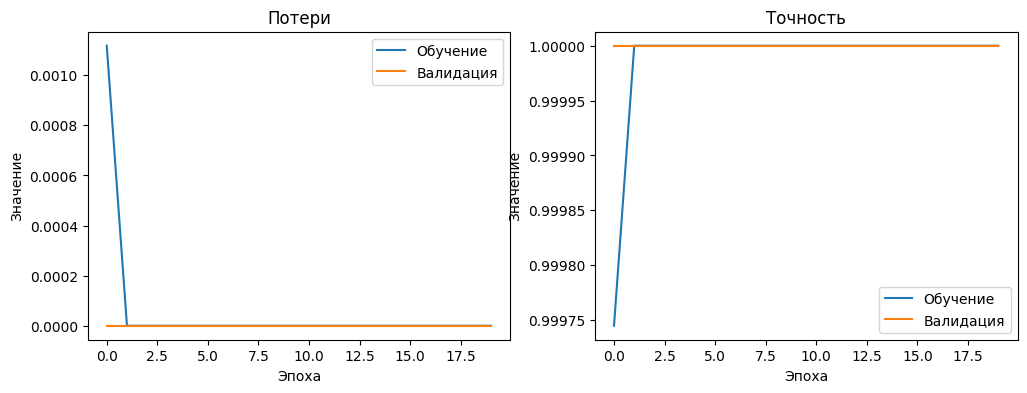

In [6]:
# Построение графиков
plt.figure(figsize=(12, 4))

# Потери
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Обучение')
plt.plot(history.history['val_loss'], label='Валидация')
plt.title('Потери')
plt.xlabel('Эпоха')
plt.ylabel('Значение')
plt.legend()

# Точность
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Обучение')
plt.plot(history.history['val_accuracy'], label='Валидация')
plt.title('Точность')
plt.xlabel('Эпоха')
plt.ylabel('Значение')
plt.legend()

plt.show()


In [7]:
# Сохранение результатов в файл
results_df.to_csv("algorithm_comparison_results_cicids2017.csv", index=False)


NameError: name 'results_df' is not defined